### **Estimación de precios de casas utilizando regresión lineal**

Se utiliza un dataset de houseprices (https://github.com/ywchiu/riii/blob/master/data/house-prices.csv), que contiene información sobre las casas, incluyendo el tamaño de la casa (en pies cuadrados), el número de habitaciones, el número de baños y la antigüedad de la casa (en años). A partir de estos datos se busca predecir el precio de venta de las casas aplicando un modelo de regresión lineal simple. 

### **1. Importación de librerias y dataset**

In [56]:
# librerias 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# dataset
df = pd.read_csv('house-prices.csv')
print(df.head(10))

   Home   Price  SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
0     1  114300  1790         2          2       2    No         East
1     2  114200  2030         4          2       3    No         East
2     3  114800  1740         3          2       1    No         East
3     4   94700  1980         3          2       3    No         East
4     5  119800  2130         3          3       3    No         East
5     6  114600  1780         3          2       2    No        North
6     7  151600  1830         3          3       3   Yes         West
7     8  150700  2160         4          2       2    No         West
8     9  119200  2110         4          2       3    No         East
9    10  104000  1730         3          3       3    No         East


### **2. Análisis exploratorio**

In [3]:
# info del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [4]:
# tipos de datos del dataframe
print("Los tipos de datos del dataframe son:")
print(df.dtypes)

Los tipos de datos del dataframe son:
Home             int64
Price            int64
SqFt             int64
Bedrooms         int64
Bathrooms        int64
Offers           int64
Brick           object
Neighborhood    object
dtype: object


In [ ]:
# valores de brick
df['Brick'].head(5)

0    No
1    No
2    No
3    No
4    No
Name: Brick, dtype: object

In [8]:
# valores de neighborhood
df['Neighborhood'].head(5)

0    East
1    East
2    East
3    East
4    East
Name: Neighborhood, dtype: object

No realizo la transformación de las columnas "brick" y "neighborhood" porque son variables categóricas, que si bien puedo transformarlas, según el instructivo de la tarea no se utilizará para el modelo de regresión.

In [9]:
# identificacion de datos faltantes con funcion proporcionada en clase
# cantidad de datos completos, sin NA, es decir, el total de datos
qsna=df.shape[0]-df.isnull().sum(axis=0)
# cantidad de datos que si son na
qna=df.isnull().sum(axis=0)
# proporcion de datos con na y sin na
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
# constuir la tab
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
# ordenar los valores de la tabla
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Home,128,0,0.0
Price,128,0,0.0
SqFt,128,0,0.0
Bedrooms,128,0,0.0
Bathrooms,128,0,0.0
Offers,128,0,0.0
Brick,128,0,0.0
Neighborhood,128,0,0.0


El dataset no posee valores faltantes y se procede a verificar la presencia o no de outliers

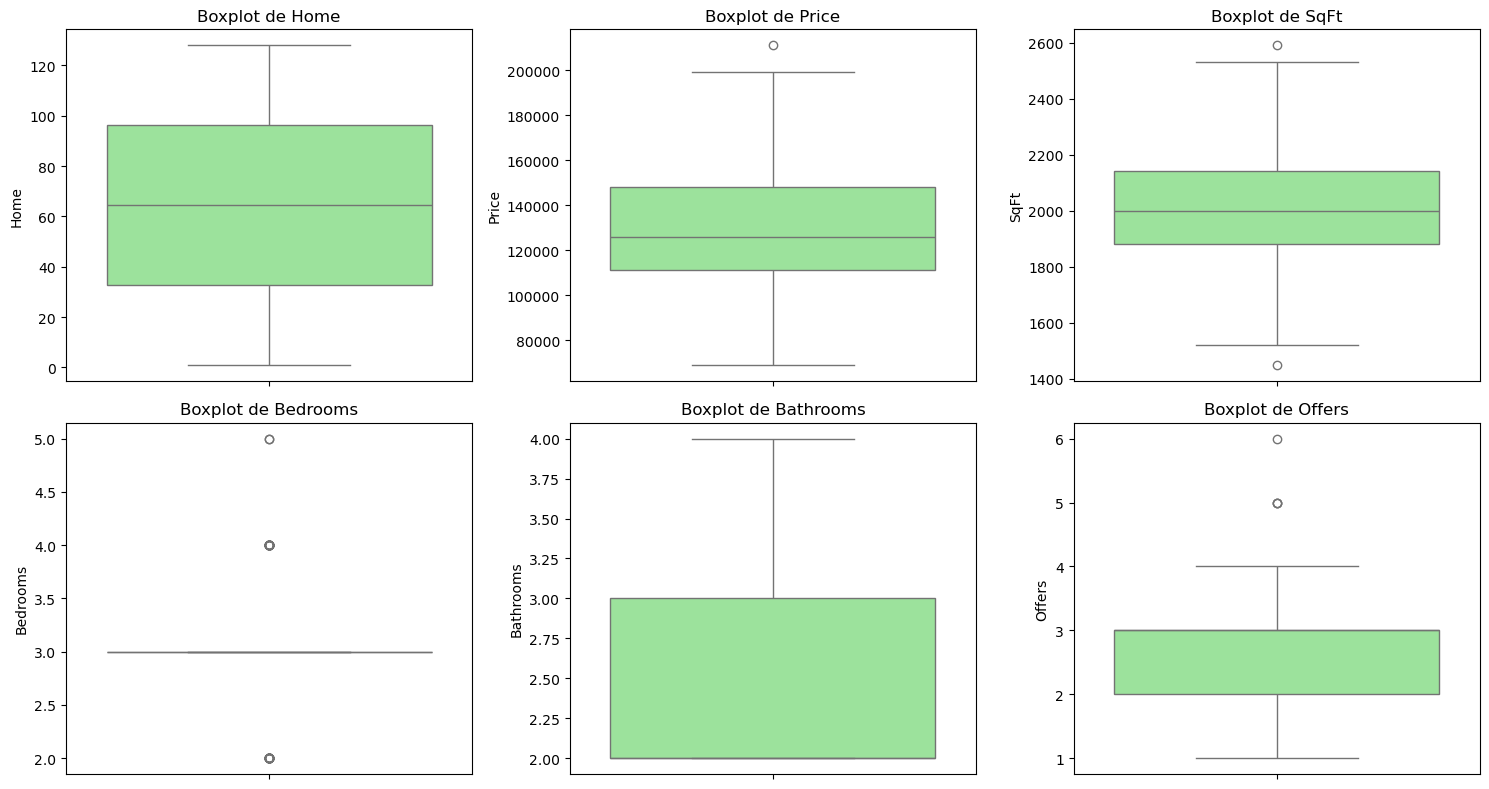

In [ ]:
# extraer columnas numericas 
numerical_columns = df.select_dtypes(include=['int64']).columns

# crear boxplots 
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    # ajusta segun la cantidad de columnas
    plt.subplot(2, 3, i)  
    sns.boxplot(y=df[col], color="lightgreen")
    plt.title(f"Boxplot de {col}")
    plt.tight_layout()

plt.show()

En los boxplots se logran algunos outliers en price, sqft (tamaño de la casa en pies cuadrados) y offers. 

In [19]:
# price
# valores unicos
print(df['Price'].unique())

# estadisticas de price
print('Estadisticas de price:\n', df['Price'].describe())

[114300 114200 114800  94700 119800 114600 151600 150700 119200 104000
 132500 123000 102600 126300 176800 145800 147100  83600 111400 167200
 116200 113800  91700 106100 156400 149300 137000  99300  69100 188000
 182000 112300 135000 139600 117800 117100 117500 147000 131300 108200
 106600 133600 105600 154000 166500 103200 129800  90300 115900 107500
 151100  91100 117400 130800  81300 125700 140900 152300 138100 155400
 180900 100900 161300 120500 130300 111100 126200 151900  93600 165600
 166700 157600 107300 144200 106900 176500 121300 143600 143400 184300
 164800 147700  90500 188300 102700 172500 127700  97800 143100 116500
 142600 157100 160600 152500 133300 126800 145500 171000 123100 136800
 211200  82300 146900 108500 134000 117000 108700 111600 114900 123600
 115700 124500 102500 199500 150200 109700 110400 144800 119700 147900
 113500 149900 124600]
Estadisticas de price:
 count       128.000000
mean     130427.343750
std       26868.770371
min       69100.000000
25%      

In [20]:
# sqft
# valores unicos
print(df['SqFt'].unique())

# estadisticas de price
print('Estadisticas de SqFt:\n', df['SqFt'].describe())

[1790 2030 1740 1980 2130 1780 1830 2160 2110 1730 1870 1910 2150 2590
 2190 1990 1700 1920 2000 1690 1820 2210 2290 1600 2040 2250 1930 2280
 2080 1880 2420 1720 1560 1840 1940 1810 2050 2100 1860 1650 2240 2090
 2200 1610 2220 1450 2140 1950 1900 2410 1520 2010 1970 2440 2060 2260
 2530 1890 1710 2070 2020]
Estadisticas de SqFt:
 count     128.000000
mean     2000.937500
std       211.572431
min      1450.000000
25%      1880.000000
50%      2000.000000
75%      2140.000000
max      2590.000000
Name: SqFt, dtype: float64


In [21]:
# offers
# valores unicos
print(df['Offers'].unique())

# estadisticas de price
print('Estadisticas de Offers:\n', df['Offers'].describe())

[2 3 1 4 5 6]
Estadisticas de Offers:
 count    128.000000
mean       2.578125
std        1.069324
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        6.000000
Name: Offers, dtype: float64


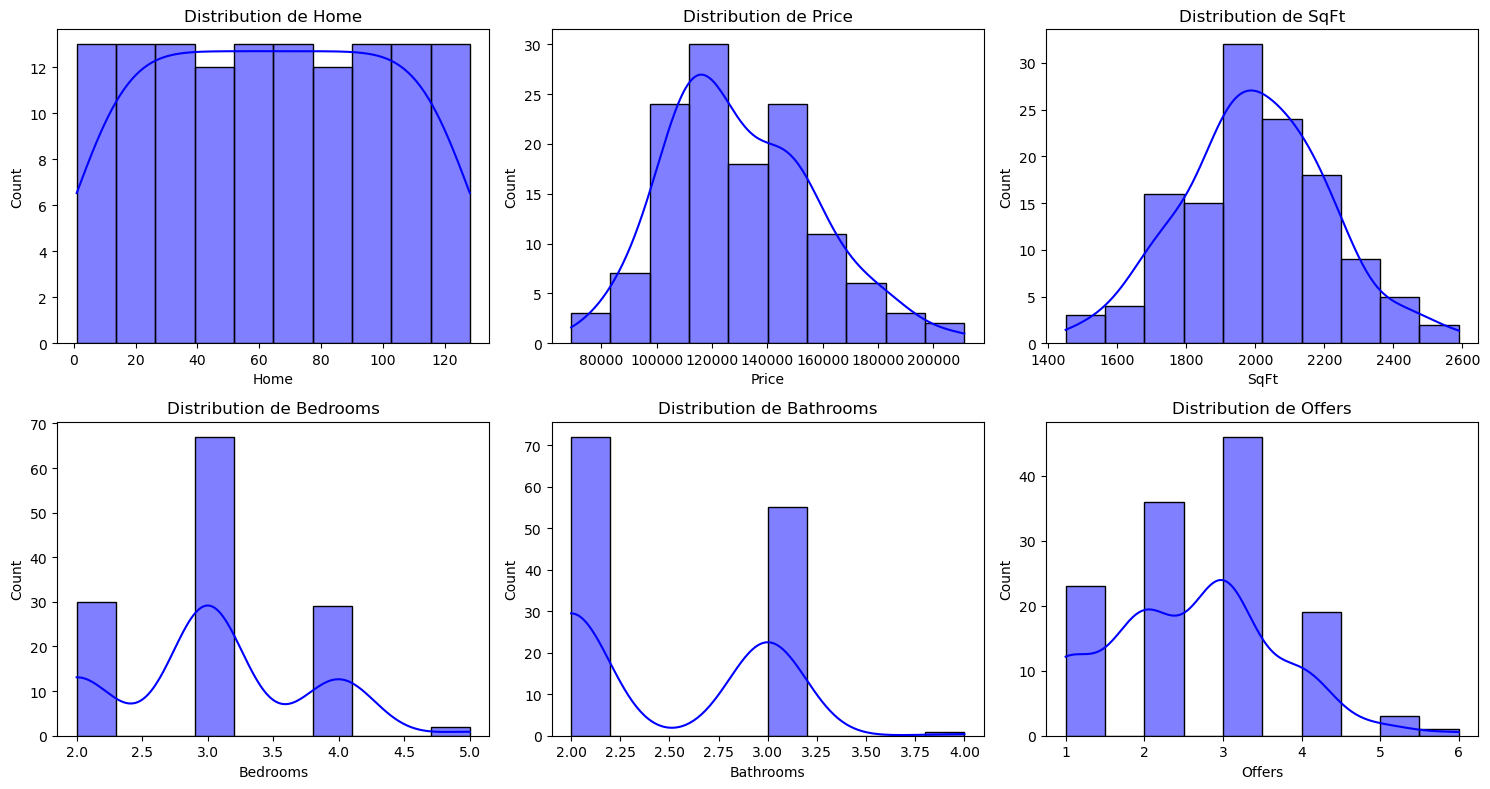

In [22]:
# distribucion de los datos
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    # ajusta segun la cantidad de columnas
    plt.subplot(2, 3, i) 
    sns.histplot(df[col], kde=True, color="blue", bins=10)  
    plt.title(f"Distribution de {col}")
    plt.tight_layout()

plt.show()

Tanto price como sqft tienen una distribucion normal de los datos. 

### **3. Preparación de los datos**

Se dividen los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%).

In [23]:
# variables predictoras y target
x = df[['SqFt','Bedrooms','Bathrooms']]
y = df['Price']

In [ ]:
# split de los datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### **4. Entrenar el modelo**

Se entrena el modelo con los datos de train

In [30]:
# crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [39]:
# realizar predicciones
# predicciones con el train
y_train_pred = model.predict(x_train)
# predicciones con el test 
y_test_pred = model.predict(x_test)

# resultados
print(y_train_pred)
print(y_test_pred)

[130040.69693882 145887.27158498 133598.02588208 123219.13307212
 144522.95881164 142135.41145829 122536.97668545 122195.89849212
 128822.93117539 142135.41145829 112499.16206883 118444.03836543
 124242.36765213 125265.60223213 133608.45662492 128676.38416548
 133120.83142167 113522.39664884 158312.63355494 104654.36362213
 112986.78727208 159335.86813495 115909.94400218 114692.17823875
 103290.05084879 168886.05754832 109088.38013548 146569.42797164
 110111.61471549 124934.95478164  97150.64336876 100220.34710878
 137349.88600876 131405.00971216 129358.54055215 103631.12904212
 113181.3184555  145351.66220822 143840.80242497 139065.70771828
 115374.33462542 117420.80378543 128335.30597215 186584.57017106
 141783.90252212 106359.7545888  113522.39664884  99879.26891544
 103972.20723546 142135.41145829 118785.11655877 144181.8806183
 111134.84929549 110793.77110216 158994.78994161 126970.99319881
 128676.38416548 147933.74074498 121172.66391211 170932.52670833
 129358.54055215 136678.16

### **5. Evaluación del modelo**

In [40]:
# evaluación del modelo en conjunto de prueba
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("Resultados en el conjunto de prueba:")
print(f"Error absoluto medio (MAE): {mae}")
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")

Resultados en el conjunto de prueba:
Error absoluto medio (MAE): 18231.56323574111
Error cuadrático medio (MSE): 448551131.876941
Coeficiente de determinación (R²): 0.30740449014754423


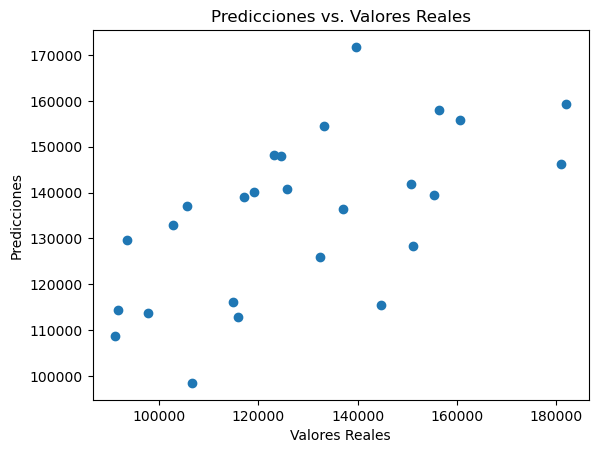

In [ ]:
# gráfico de dispersión de las predicciones vs. valores reales
plt.scatter(y_test, y_test_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()

### **6. Predecir utilizando el modelo entrenado**

Usa el modelo entrenado para predecir el precio de una casa con las siguientes características:
* Tamaño: 2000 pies cuadrados
* Habitaciones: 3
* Baños: 2

In [55]:
# características de la casa
new_house = pd.DataFrame([[2000, 3, 2]], columns=['SqFt', 'Bedrooms', 'Bathrooms'])

# predecir el precio
predicted_price = model.predict(new_house)

print(f"El precio estimado para la casa es: ${predicted_price[0]:,.2f}")

El precio estimado para la casa es: $124,924.52


### **Utilizando escalamiento**

En este segmento se realiza el mismo proceso de entrenamiento del modelo pero utilizando el escalamiento, en este caso el MinMaxScaler

In [57]:
# normalización de los datos de entrada usando MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [58]:
# modelo de regresión lineal
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [59]:
# evaluación del modelo en conjunto de prueba
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("Resultados en el conjunto de prueba:")
print(f"Error absoluto medio (MAE): {mae}")
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")

Resultados en el conjunto de prueba:
Error absoluto medio (MAE): 18231.56323574111
Error cuadrático medio (MSE): 448551131.876941
Coeficiente de determinación (R²): 0.30740449014754423


En este caso, utilizar o no utilizar escalamiento no representa una diferencia ya que los errores son iguales para ambos casos.